### EJERCICIO 1


Fracción de varianza explicada por las primeras componentes de PCA [0.92461872 0.05306648 0.01710261 0.00521218]
92.5%
5.3%
1.7%
0.5%
Fracción de varianza explicada por las primeras componentes de LDA [0.9912126 0.0087874]
99.1%
0.9%


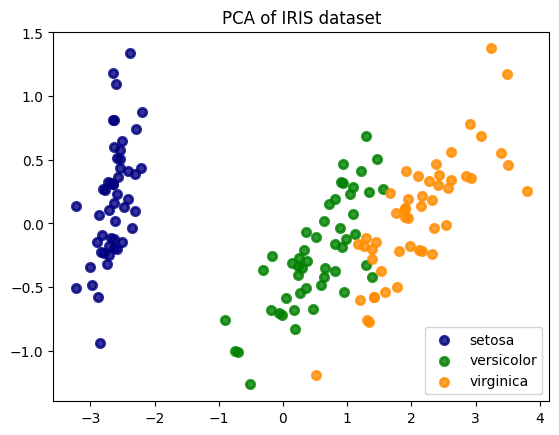

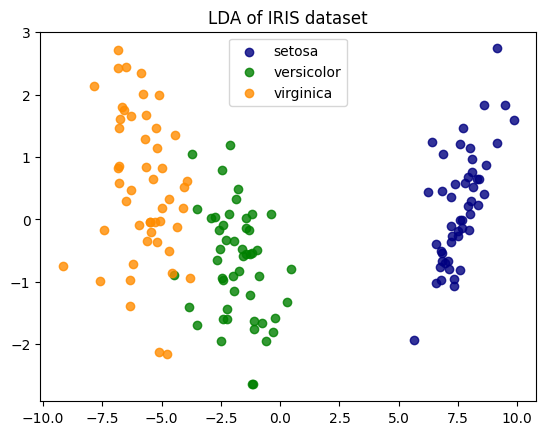

In [6]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data #DATOS
y = iris.target #ETIQUETAS
target_names = iris.target_names #si quiero mostrar una figura q aparezcan los nombres

pca = PCA(n_components=4) #Crea un objeto PCA con 4 componentes.
X_r = pca.fit(X).transform(X) #Ajusta el PCA a los datos X y transforma los datos X a una nueva matriz X_r con 4 características.

lda = LinearDiscriminantAnalysis(n_components=2) #remember n components cannot be larger than min(n features, n classes-1)
X_r2 = lda.fit(X, y).transform(X) #Ajusta el LDA a los datos X y y, y transforma los datos X a una nueva matriz X_r2 con 2 características.

# Percentage of variance explained for each components
print( #imprime la fracción de varianza explicada por las dos primeras componentes de PCA.
      "Fracción de varianza explicada por las primeras componentes de PCA %s"
      % str(pca.explained_variance_ratio_)
)
porcentajes = [100 * valor for valor in pca.explained_variance_ratio_]

for porcentaje in porcentajes:
    print("{:.1f}%".format(porcentaje))


print( #imprime la fracción de varianza explicada por las dos primeras componentes de LDA.
      "Fracción de varianza explicada por las primeras componentes de LDA %s"
      % str(lda.explained_variance_ratio_)
)
porcentajes = [100 * valor for valor in lda.explained_variance_ratio_]

for porcentaje in porcentajes:
    print("{:.1f}%".format(porcentaje))


plt.figure() #Crea una nueva figura para el gráfico de PCA.
colors = ["navy", "green", "darkorange"] #lista de colores para las clases.
lw = 2 #grosor

for color, i, target_name in zip(colors, [0, 1, 2], target_names): #Itera sobre los colores, índices de clase y nombres de clase.
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    ) #Agrega un punto al gráfico para cada muestra en la clase i con el color correspondiente y el nombre de clase.
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()
#El eje horizontal es el que guarda la mayor variabilidad de los datos

In [7]:
help(LinearDiscriminantAnalysis)

Help on class LinearDiscriminantAnalysis in module sklearn.discriminant_analysis:

class LinearDiscriminantAnalysis(sklearn.base.ClassNamePrefixFeaturesOutMixin, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)
 |  
 |  Linear Discriminant Analysis.
 |  
 |  A classifier with a linear decision boundary, generated by fitting class
 |  conditional densities to the data and using Bayes' rule.
 |  
 |  The model fits a Gaussian density to each class, assuming that all classes
 |  share the same covariance matrix.
 |  
 |  The fitted model can also be used to reduce the dimensionality of the input
 |  by projecting it to the most discriminative directions, using the
 |  `transform` method.
 |  
 |  .. versionadded:: 0.17
 |     *LinearDiscriminantAnalysis*.
 |  
 |  Read more in

 Discutir las siguientes afirmaciones:
i) PCA identifies the combination of attributes (principal components, or directions in the featurespace) that account for the most variance in the data.

ii) LDA tries to identify attributes that account for the most variance between classes.

iii) LDA, in contrast to PCA, is a supervised method, using known class labels.

La afirmación i) es correcta. El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica utilizada para reducir la dimensionalidad de un conjunto de datos mientras se conserva la mayor cantidad posible de información. Identifica las combinaciones lineales de atributos que explican la mayor varianza en los datos. Estas combinaciones lineales se conocen como componentes principales y son las direcciones en el espacio de características que capturan la mayor variabilidad de los datos.

La afirmación ii) es incorrecta. La descripción proporcionada se ajusta más al Análisis Discriminante Lineal (LDA, por sus siglas en inglés) en lugar de PCA. LDA es una técnica de reducción de dimensionalidad que se utiliza principalmente en problemas de clasificación. Su objetivo es encontrar las combinaciones de atributos que maximizan la separación entre las clases en los datos. Por lo tanto, LDA busca identificar los atributos que explican la mayor varianza entre las clases, en lugar de la varianza total en los datos.

La afirmación iii) es correcta. A diferencia de PCA, que es un método no supervisado y no requiere información sobre las etiquetas de clase, LDA es un método supervisado. LDA utiliza las etiquetas de clase conocidas para encontrar las combinaciones de atributos que maximizan la separabilidad entre las clases. Al incorporar información de clase en su análisis, LDA puede ser más efectivo en aplicaciones de clasificación donde se requiere una separación clara entre las clases.

### Ejercicio 2
 nota: no podes hacer LDA porque tenes solo dos categorias de tumores


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
X = cancer.data
y = cancer.target
target_names = cancer.target_names

pca = PCA(n_components=10) #Crea un objeto PCA con 2 componentes.
X_r = pca.fit(X).transform(X) #Ajusta el PCA a los datos X y transforma los datos X a una nueva matriz X_r con 2 características.

print( #mprime la fracción de varianza explicada por las dos primeras componentes de PCA.
      "Fracción de varianza explicada por las primeras componentes de PCA %s"
      % str(pca.explained_variance_ratio_)
)
porcentajes = [100 * valor for valor in pca.explained_variance_ratio_]

for porcentaje in porcentajes:
    print("{:.1f}%".format(porcentaje))


Fracción de varianza explicada por las primeras componentes de PCA [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07]
98.2%
1.6%
0.2%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.0%


Text(0.5, 1.0, 'PCA of Cancer dataset')

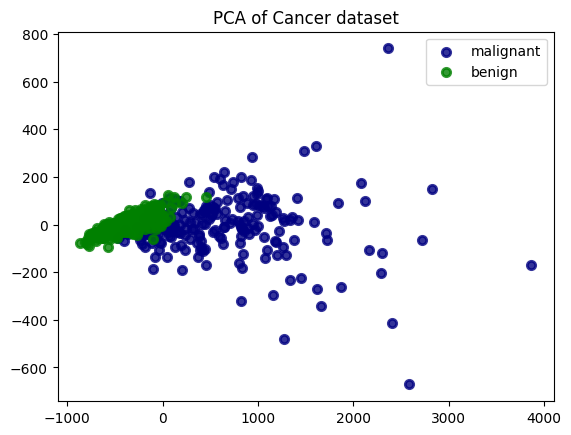

In [ ]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names): #Itera sobre los colores, índices de clase y nombres de clase.
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    ) #Agrega un punto al gráfico para cada muestra en la clase i con el color correspondiente y el nombre de clase.
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Cancer dataset")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25 , random_state=42
)

scaler = StandardScaler()
#Con 30 dim
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Con 3 dim
pca = PCA(n_components=3)
X_train_3 = pca.fit(X_train).transform(X_train)
X_test_3 = pca.fit(X_test).transform(X_test)

NameError: ignored

In [ ]:
#Con 30 dimensiones
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Con 3 dim
model = GaussianNB()
model.fit(X_train_3, y_train)
y_pred_3 = model.predict(X_test_3)

Acuraccy = 0.951048951048951
Acuraccy = 0.9230769230769231


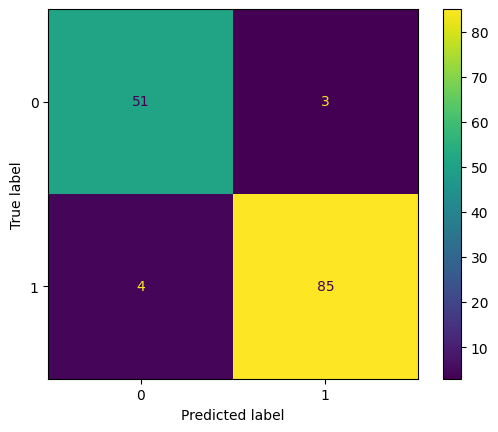

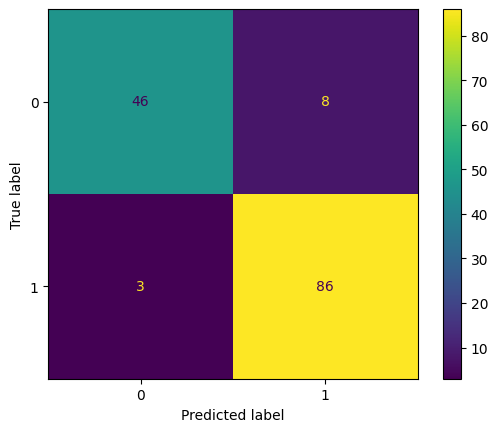

In [ ]:
#Con 30 dim
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    )

accuray = accuracy_score(y_test, y_pred)
print("Acuraccy =",accuray)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#Con 3 dim
accuray = accuracy_score(y_test, y_pred_3)
print("Acuraccy =",accuray)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_3)

#### cosa que hace el StandardScaler

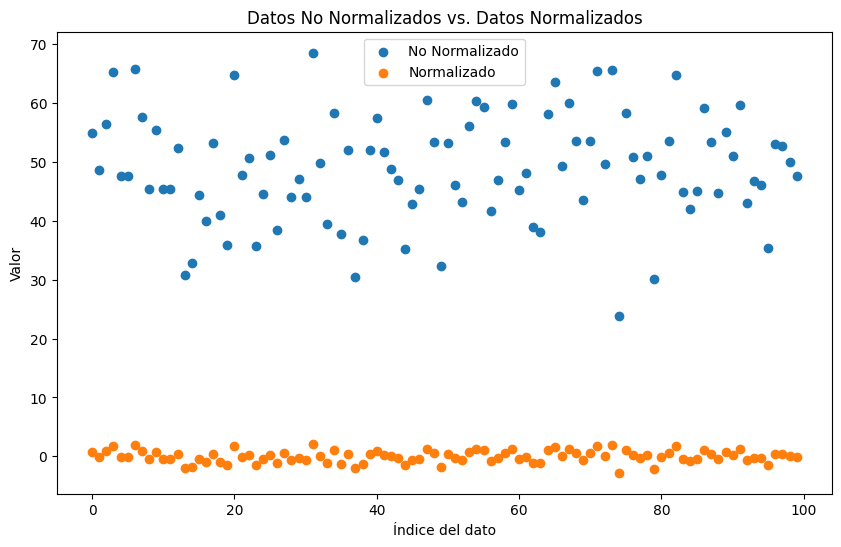

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generar conjunto de datos no normalizados
np.random.seed(42)
datos_no_normalizados = np.random.normal(loc=50, scale=10, size=100)

# Normalizar los datos utilizando StandardScaler
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_no_normalizados.reshape(-1, 1))

# Graficar los datos originales y normalizados
plt.figure(figsize=(10, 6))
plt.scatter(range(len(datos_no_normalizados)), datos_no_normalizados, label='No Normalizado')
plt.scatter(range(len(datos_normalizados)), datos_normalizados, label='Normalizado')
plt.xlabel('Índice del dato')
plt.ylabel('Valor')
plt.legend()
plt.title('Datos No Normalizados vs. Datos Normalizados')
plt.show()


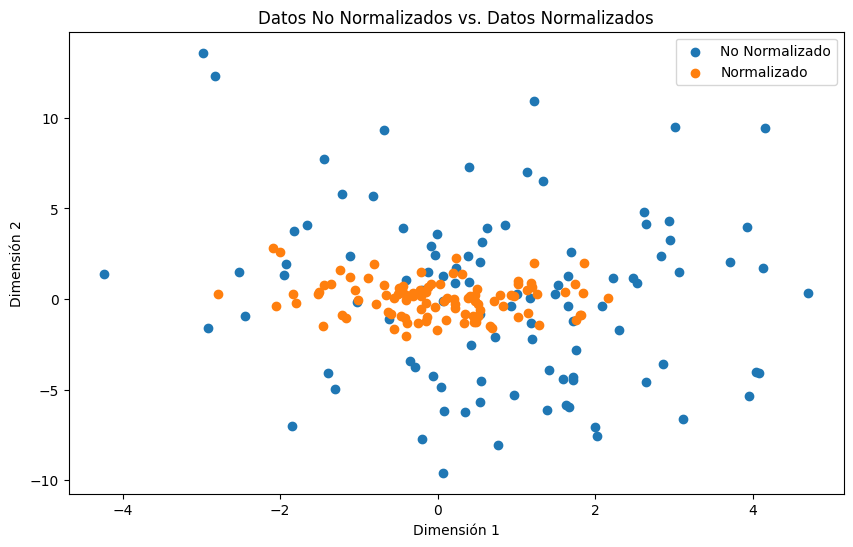

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generar conjunto de datos dispersos en R2
np.random.seed(42)
n_samples = 100
x = np.random.normal(loc=1, scale=2, size=n_samples)
y = np.random.normal(loc=0, scale=5, size=n_samples)
datos_no_normalizados = np.column_stack((x, y))

# Normalizar los datos utilizando StandardScaler
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_no_normalizados)

# Graficar los datos originales y normalizados
plt.figure(figsize=(10, 6))
plt.scatter(datos_no_normalizados[:, 0], datos_no_normalizados[:, 1], label='No Normalizado')
plt.scatter(datos_normalizados[:, 0], datos_normalizados[:, 1], label='Normalizado')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.title('Datos No Normalizados vs. Datos Normalizados')
plt.show()


In [3]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feat

### EJERCICIO 3

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60) #cada cara tenga al menos 60 ejemplos

In [ ]:
print(faces.target_names)
print(faces.data[1])
#print(faces.DESCR)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
[0.28627452 0.20784314 0.2535948  ... 0.96993464 0.95032686 0.9346406 ]


In [ ]:
from time import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import train_test_split


In [ ]:
#a)
XF = faces.data
yF = faces.target
target_names=faces.target_names
n_samples, h, w = faces.images.shape

print("image heigh %d" % h)
print("image width %d" % w)
#print("Total dataset size:")
print("n_samples: %d" % n_samples) #Ejemplos
print("n_features: %d" % XF.shape[1]) #Caracteristicas o Variables o atributos
print("n_classes: %d" % target_names.shape[0]) #clases



image heigh 62
image width 47
n_samples: 1348
n_features: 2914
n_classes: 8


#### **Eigenfaces**

In [ ]:
#b)
pca = PCA(n_components=150, svd_solver="randomized", whiten=False)
F150= pca.fit(XF)
print(F150)

PCA(n_components=150, svd_solver='randomized')


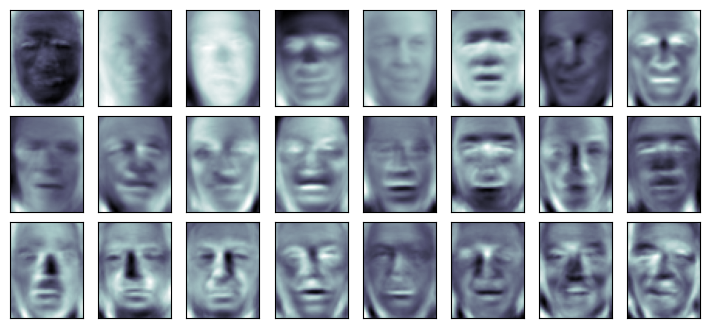

In [ ]:
#c)
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace = 0.1, wspace =0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(h,w), cmap='bone')

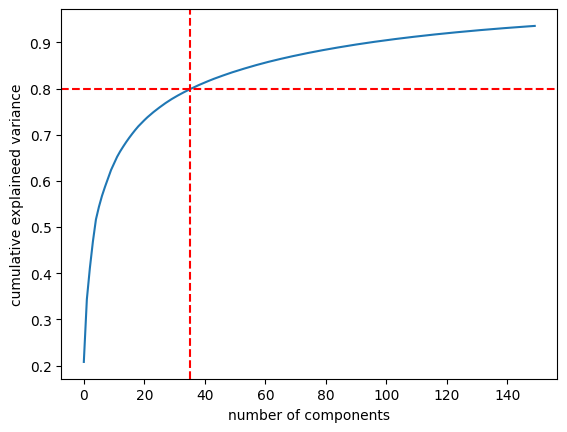

In [ ]:
#d)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explaineed variance')
plt.axhline(y=0.8,color='r',linestyle='--')
plt.axvline(x=35,color='r',linestyle='--')

In [ ]:
components=pca.transform(faces.data)
projected150=pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nrecontruction')

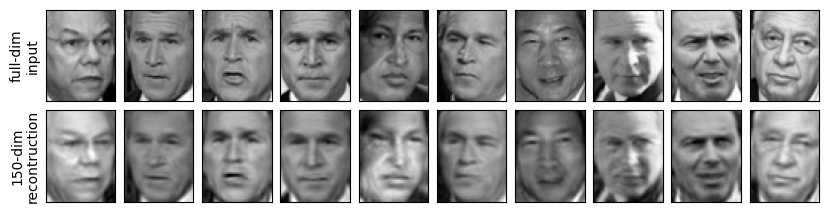

In [ ]:
#e)

fig, ax=plt.subplots(2,10,figsize=(10,2.5),
                     subplot_kw={'xticks':[],'yticks':[]},
                     gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i in range(10):
  ax[0,i].imshow(faces.data[i].reshape(h,w),cmap='binary_r')
  ax[1,i].imshow(projected150[i].reshape(h,w),cmap='binary_r')

ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('150-dim\nrecontruction')


**PCA150**

In [ ]:
#f)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    XF, yF, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pca=PCA(n_components=150,svd_solver='randomized',whiten=False)
X_train_150=pca.fit(X_train).transform(X_train)
X_test_150=pca.transform(X_test)

In [ ]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_150, y_train);
y_pred = model.predict(X_test_150)

In [ ]:
type(target_names)

numpy.ndarray

Acuraccy = 0.6498516320474778
                   precision    recall  f1-score   support

     Ariel Sharon       0.45      0.67      0.54        15
     Colin Powell       0.56      0.59      0.57        68
  Donald Rumsfeld       0.84      0.52      0.64        31
    George W Bush       0.64      0.79      0.71       126
Gerhard Schroeder       0.81      0.57      0.67        23
      Hugo Chavez       0.70      0.35      0.47        20
Junichiro Koizumi       0.91      0.83      0.87        12
       Tony Blair       0.77      0.55      0.64        42

         accuracy                           0.65       337
        macro avg       0.71      0.61      0.64       337
     weighted avg       0.67      0.65      0.65       337



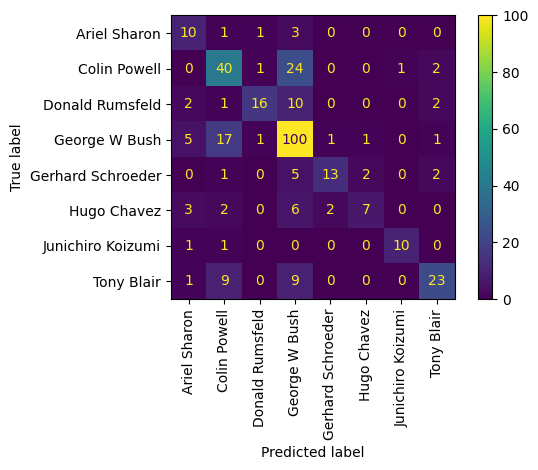

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    )

accuray = accuracy_score(y_test, y_pred)
print("Acuraccy =",accuray)
print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels= target_names, xticks_rotation='vertical'
    )
plt.tight_layout()
plt.show()

**PCA 35**

In [ ]:
#g)

#pca para 35 componentes
pca = PCA(n_components=35, svd_solver="randomized", whiten=False)
X_train_35 = pca.fit(X_train).transform(X_train)
X_test_35 = pca.transform(X_test)

In [ ]:
#Compute the components and projected faces
components = pca.transform(faces.data)
projected35 = pca.inverse_transform(components)

Text(0, 0.5, '35-dim\nreconstruction')

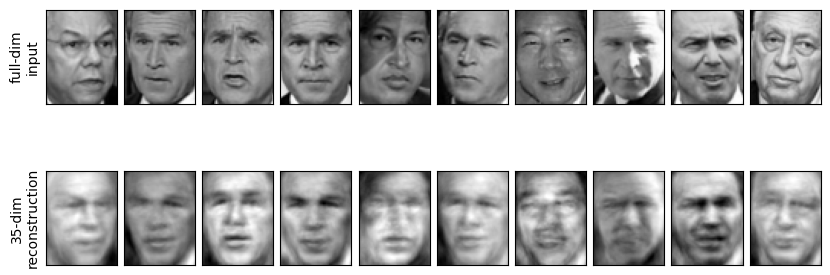

In [ ]:
#plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 4.0),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47), cmap='binary_r')
    ax[1,i].imshow(projected35[i].reshape(62,47), cmap='binary_r')

ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('35-dim\nreconstruction')


Acuraccy = 0.7329376854599406
                   precision    recall  f1-score   support

     Ariel Sharon       0.47      0.53      0.50        15
     Colin Powell       0.85      0.78      0.82        68
  Donald Rumsfeld       0.71      0.55      0.62        31
    George W Bush       0.74      0.85      0.79       126
Gerhard Schroeder       0.45      0.61      0.52        23
      Hugo Chavez       0.73      0.40      0.52        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.78      0.69      0.73        42

         accuracy                           0.73       337
        macro avg       0.72      0.67      0.68       337
     weighted avg       0.74      0.73      0.73       337



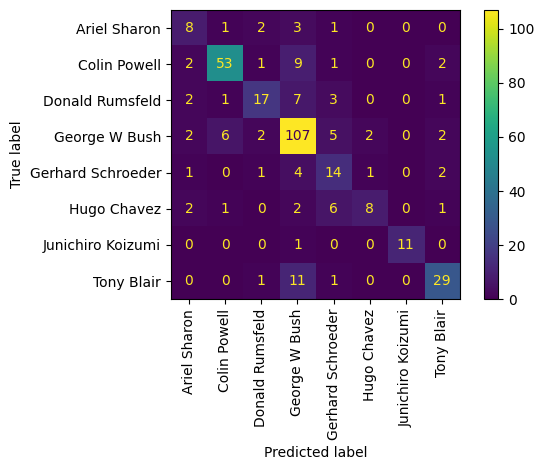

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    XF, yF, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca=PCA(n_components=35,svd_solver='randomized',whiten=False)
X_train_35=pca.fit(X_train).transform(X_train)
X_test_35=pca.transform(X_test)

#naive bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_35, y_train);
y_pred = model.predict(X_test_35)

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    )

accuray = accuracy_score(y_test, y_pred)
print("Acuraccy =",accuray)
print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels= target_names, xticks_rotation='vertical'
    )
plt.tight_layout()
plt.show()

 **En web sklearn**

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples) #Ejemplos
print("n_features: %d" % n_features) #Caracteristicas o Variables o atributos
print("n_classes: %d" % n_classes) #clases




Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #Aplico la transformacion de escala obtenida en la linea anterior

In [ ]:
n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.496s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.058s


In [ ]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 8.604s
Best estimator found by grid search:
SVC(C=14435.906308966758, class_weight='balanced', gamma=0.0032299229881198282)


Predicting people's names on the test set
done in 0.176s
                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.77      0.74        13
     Colin Powell       0.77      0.90      0.83        60
  Donald Rumsfeld       0.72      0.67      0.69        27
    George W Bush       0.91      0.95      0.93       146
Gerhard Schroeder       0.90      0.76      0.83        25
      Hugo Chavez       0.80      0.53      0.64        15
       Tony Blair       0.93      0.78      0.85        36

         accuracy                           0.86       322
        macro avg       0.82      0.77      0.79       322
     weighted avg       0.86      0.86      0.85       322



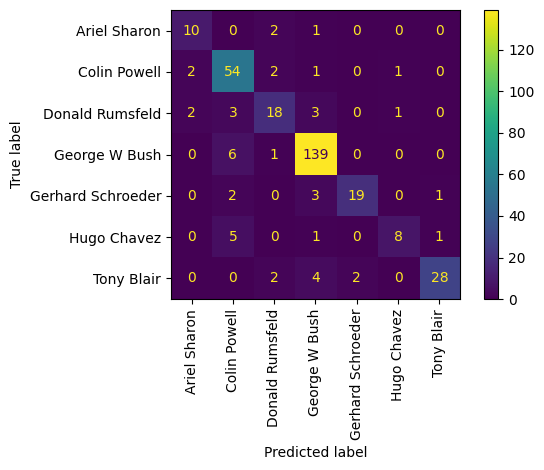

In [ ]:


print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()



In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

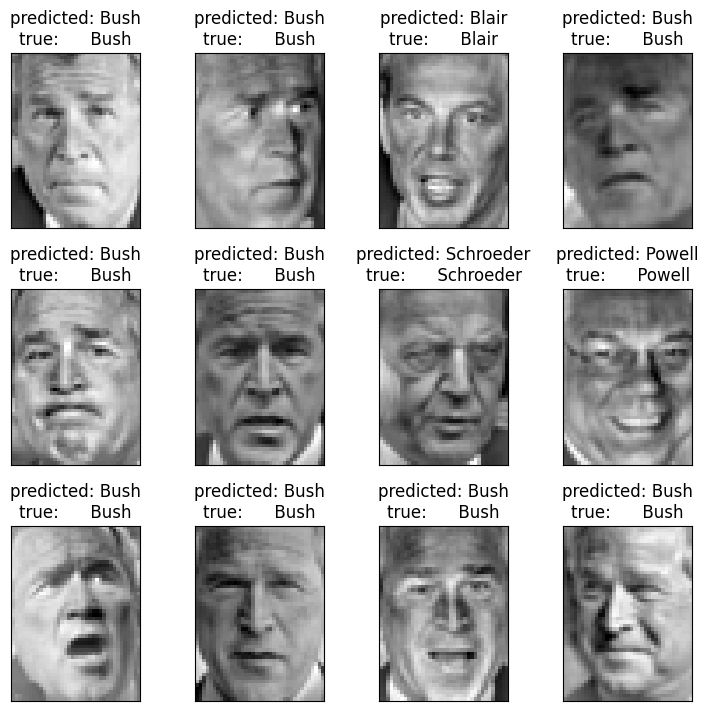

In [ ]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

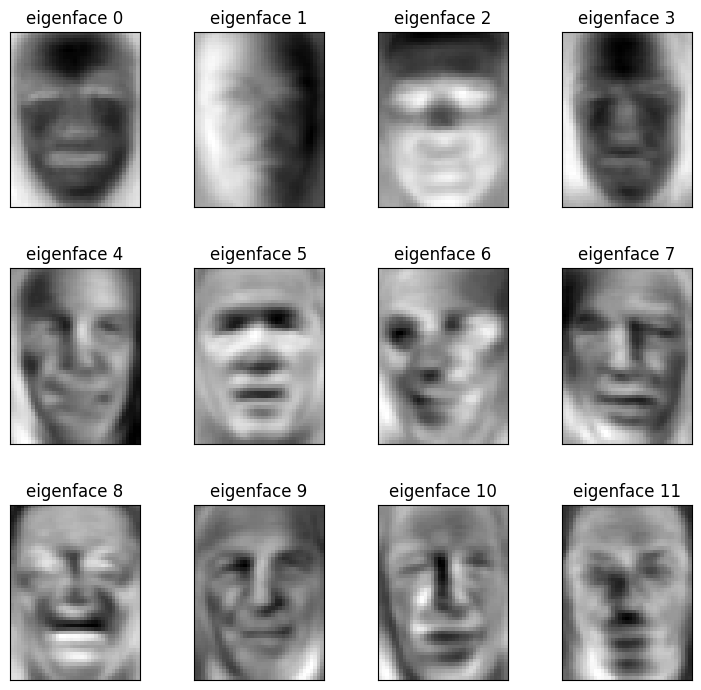

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()